# 선형 회귀 모델의 실제 활용 사례 

- 보스턴 주택 데이터셋에서 선형 회귀 모델을 학습하고, 테스트 데이터를 이용하여 예측값을 구하고 실제 집값과 비교하는 코드 작성

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

 #### 보스턴 집 값 데이터 로드 

In [2]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['target'] = boston.target
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  target  
0       15.3  396.90   4.98    24.0  
1       17.8  396.90   

/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

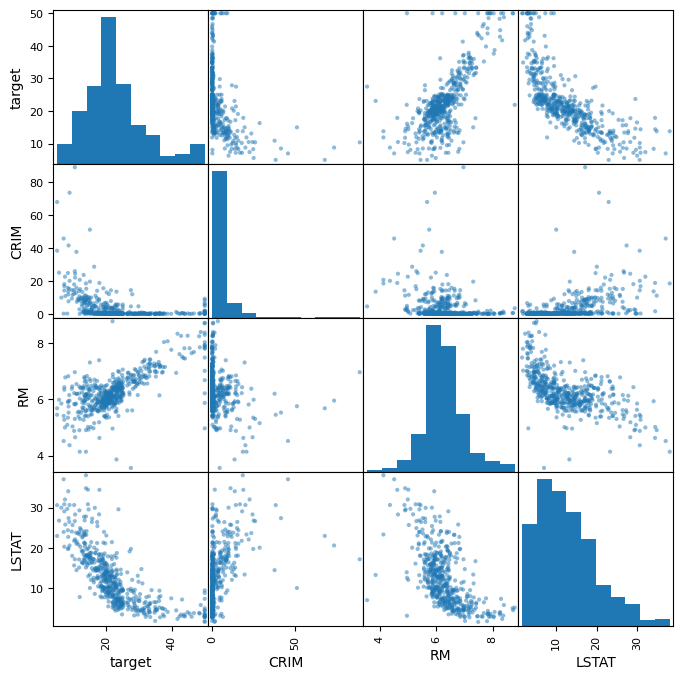

In [3]:
# 주택 가격과 다른 변수들 간의 상관관계 시각화 
pd.plotting.scatter_matrix(df[['target', 'CRIM', 'RM', 'LSTAT']] , figsize=(8,8), diagonal='hist')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드 
boston_temp = load_boston()
x, y = boston_temp.data, boston_temp.target

# 데이터 전처리 
scaler = StandardScaler()
x = scaler.fit_transform(x)
y = y.reshape(-1,1)

# 데이터셋 분리 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

print(x_train.shape)

print(len(x_train), len(x_test), len(y_train) , len(y_test))
# print(x_train, y_train)

(404, 13)
404 102 404 102


/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include t

### 선형회귀 모델 정의 

In [5]:
import torch 
class LinearRegression(torch.nn.Module) : 
    def __init__(self) : 
        super(LinearRegression, self).__init__()
        # x_train.shape ===> (404, 13)
        self.linear = torch.nn.Linear(x_train.shape[1], 1)
    
    def forward(self, x) :
        out = self.linear(x)
        return out

#### 모델 학습 

In [6]:
model = LinearRegression()

# loss 함수 지정 
criterion = torch.nn.MSELoss()

# 옵티마이저 지정 
optimizer = torch.optim.SGD(model.parameters(), lr=0.0025)

for epoch in range(10000) : 
    inputs = torch.autograd.Variable(torch.from_numpy(x_train).float())
    labels = torch.autograd.Variable(torch.from_numpy(y_train).float())
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0 :
        print("epoch {}, loss {}".format(epoch, loss.item()))

epoch 0, loss 586.6818237304688
epoch 100, loss 218.1620330810547
epoch 200, loss 96.05103302001953
epoch 300, loss 50.80134201049805
epoch 400, loss 33.800106048583984
epoch 500, loss 27.285499572753906
epoch 600, loss 24.7055721282959
epoch 700, loss 23.62322998046875
epoch 800, loss 23.12352752685547
epoch 900, loss 22.859033584594727
epoch 1000, loss 22.695659637451172
epoch 1100, loss 22.58029556274414
epoch 1200, loss 22.491012573242188
epoch 1300, loss 22.418109893798828
epoch 1400, loss 22.356792449951172
epoch 1500, loss 22.30439567565918
epoch 1600, loss 22.259178161621094
epoch 1700, loss 22.21990966796875
epoch 1800, loss 22.185646057128906
epoch 1900, loss 22.155611038208008
epoch 2000, loss 22.129192352294922
epoch 2100, loss 22.105854034423828
epoch 2200, loss 22.085168838500977
epoch 2300, loss 22.066768646240234
epoch 2400, loss 22.050344467163086
epoch 2500, loss 22.035627365112305
epoch 2600, loss 22.022397994995117
epoch 2700, loss 22.010469436645508
epoch 2800, los

### 모델 평가 

In [7]:
import numpy as np

model.eval() # 평가모드로 진행

# 예전 버전에서 적용되어야하는 모습 -> 이제는 이렇게 사용안함 !!! 
# x_test = torch.autograd.Variable(torch.from_numpy(x_test).float())
# y_test = torch.autograd.Variable(torch.from_numpy(y_test).float())

# 최신 버전에서 적용 모습  
x_test = torch.from_numpy(x_test).float()
y_test = torch.from_numpy(y_test).float()

y_pred = model(x_test)

mse = criterion(y_pred, y_test)
rmse = np.sqrt(mse.item())
print("RMSE >> ", rmse)

RMSE >>  4.837026544314727


### 실제 집값 과 예측한 집값 차이 비교 

In [8]:
with torch.no_grad() : # 자동미분 방지 -> 비활성화 -> 모델 추론 하는 경우에사용 합니다. (기울기를 계산할 필요가 없음)
    x_sample = x_test[0]
    y_true = y_test[0].item()
    y_pred = model(x_sample).item()
    
    print(f"실제 집값 : {y_true:.2f}, 예측 집값 : {y_pred:.2f}")

실제 집값 : 28.20, 예측 집값 : 32.58
